This code has been generated building on insights obtained from pluralsight.com, datacamp.com, geeksforgeeks.org, and educative.io

In [1]:
from google.colab import files
uploaded = files.upload()

Saving BUSI 9904 Project_1.xlsx to BUSI 9904 Project_1.xlsx


In [2]:
import pandas as pd
import numpy as np
import re
import nltk

In [3]:
# loading the dataset

df = pd.read_excel("BUSI 9904 Project_1.xlsx")


In [5]:
# Remove stopwords
from nltk.corpus import stopwords
nltk.download("stopwords")
stop_words = set(stopwords.words("english"))
def remove_stopwords(tweets):
      tweets =  " ".join([word for word in tweets.split() if word not in stop_words])
      return tweets
df['Transcript'] = df['Transcript'].apply(remove_stopwords)
print(df['Transcript'])

0     Intro I’m Patrick Anquetil, I’m France origina...
1     I came U.S. back 1991 right college. I think I...
2     At first I wanted real estate, that's I ended ...
3     ntro My name Bernat Olle, I'm CEO Vedanta Bios...
4     My name Max Versace, I Italy name company I fo...
5     My family Kosovo, I'd moved Macedonia. In Mace...
6     Crown Heights Brooklyn Jamaica arrived New Yor...
7     Intro immigrants immigrant isolating come time...
8     Why Kansas City I'm Benny Lee, Chairman CEO Du...
9     Intro thank much V lab giving opportunity shar...
10    topic close heart I mean asked nobody answer q...
11    hola esta nada como estas bien de voz como est...
12    good evening thank coming um um i'm honored al...
Name: Transcript, dtype: object


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [7]:
# remove punctuation
import string

def remove_punctuation(tweets):
    tweets = tweets.translate(str.maketrans('','',string.punctuation))
    return tweets
df['Transcript'] = df['Transcript'].apply(remove_punctuation)
print(df['Transcript'])

0     Intro I’m Patrick Anquetil I’m France original...
1     I came US back 1991 right college I think I lo...
2     At first I wanted real estate thats I ended mo...
3     ntro My name Bernat Olle Im CEO Vedanta Biosci...
4     My name Max Versace I Italy name company I fou...
5     My family Kosovo Id moved Macedonia In Macedon...
6     Crown Heights Brooklyn Jamaica arrived New Yor...
7     Intro immigrants immigrant isolating come time...
8     Why Kansas City Im Benny Lee Chairman CEO Dura...
9     Intro thank much V lab giving opportunity shar...
10    topic close heart I mean asked nobody answer q...
11    hola esta nada como estas bien de voz como est...
12    good evening thank coming um um im honored alw...
Name: Transcript, dtype: object


In [8]:
# remove leading and trailing white spaces

def remove_space(tweets):
      # cleaning the text to remove extra whitespace 
      tweets = " ".join([word for word in tweets.split()])
      return tweets
df['Transcript'] = df['Transcript'].apply(remove_space)
print(df['Transcript'])

0     Intro I’m Patrick Anquetil I’m France original...
1     I came US back 1991 right college I think I lo...
2     At first I wanted real estate thats I ended mo...
3     ntro My name Bernat Olle Im CEO Vedanta Biosci...
4     My name Max Versace I Italy name company I fou...
5     My family Kosovo Id moved Macedonia In Macedon...
6     Crown Heights Brooklyn Jamaica arrived New Yor...
7     Intro immigrants immigrant isolating come time...
8     Why Kansas City Im Benny Lee Chairman CEO Dura...
9     Intro thank much V lab giving opportunity shar...
10    topic close heart I mean asked nobody answer q...
11    hola esta nada como estas bien de voz como est...
12    good evening thank coming um um im honored alw...
Name: Transcript, dtype: object


In [9]:
# Apply lemmatization on every word

from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
nltk.download("wordnet")
nltk.download("omw-1.4")
nltk.download('punkt')

wnl = WordNetLemmatizer()

def lemmatized_word(tweets):

      tweet_token = word_tokenize(tweets)
      tweets = ' '.join([wnl.lemmatize(word) for word in tweet_token])
      return tweets

df['Transcript'] = df['Transcript'].apply(lemmatized_word)
print(df['Transcript'])


[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


0     Intro I ’ m Patrick Anquetil I ’ m France orig...
1     I came US back 1991 right college I think I lo...
2     At first I wanted real estate thats I ended mo...
3     ntro My name Bernat Olle Im CEO Vedanta Biosci...
4     My name Max Versace I Italy name company I fou...
5     My family Kosovo Id moved Macedonia In Macedon...
6     Crown Heights Brooklyn Jamaica arrived New Yor...
7     Intro immigrant immigrant isolating come time ...
8     Why Kansas City Im Benny Lee Chairman CEO Dura...
9     Intro thank much V lab giving opportunity shar...
10    topic close heart I mean asked nobody answer q...
11    hola esta nada como estas bien de voz como est...
12    good evening thank coming um um im honored alw...
Name: Transcript, dtype: object


In [10]:
# Obtaining polarity for each tweet in the dataset

from textblob import TextBlob

# Create a function to get the polarity
def getPolarity (twt):
 return TextBlob(twt).sentiment.polarity

# Create a new column to save the results of the created function
df['Polarity'] = df['Transcript'].apply(getPolarity)
print(df['Transcript'])


0     Intro I ’ m Patrick Anquetil I ’ m France orig...
1     I came US back 1991 right college I think I lo...
2     At first I wanted real estate thats I ended mo...
3     ntro My name Bernat Olle Im CEO Vedanta Biosci...
4     My name Max Versace I Italy name company I fou...
5     My family Kosovo Id moved Macedonia In Macedon...
6     Crown Heights Brooklyn Jamaica arrived New Yor...
7     Intro immigrant immigrant isolating come time ...
8     Why Kansas City Im Benny Lee Chairman CEO Dura...
9     Intro thank much V lab giving opportunity shar...
10    topic close heart I mean asked nobody answer q...
11    hola esta nada como estas bien de voz como est...
12    good evening thank coming um um im honored alw...
Name: Transcript, dtype: object


In [11]:
sentiment = []

for value in df['Polarity']:
    if value > 0:
      sentiment.append("Positive")
    elif value < 0:
      sentiment.append("Negative")
    else:
      sentiment.append("Neutral")
df['Sentiment'] = sentiment

import plotly.express as px

plot_1 = px.histogram(df, x="Sentiment")
plot_1.update_traces(marker_color="turquoise",marker_line_color='rgb(8,48,107)',
                  marker_line_width=1.5)
plot_1.update_layout(title_text='Sentiment')
plot_1.show()

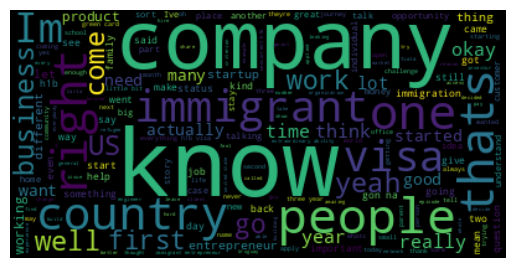

In [12]:
# generating a word cloud
import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS


stopwords = set(STOPWORDS)
stopwords.update(['um', 'uh', 'u'])
words = " ".join(word for word in df.Transcript)

wordcloud2 = WordCloud(stopwords=stopwords).generate(words) 
plt.imshow(wordcloud2, interpolation='bilinear')
plt.axis("off")
plt.show()
